In [94]:
# allow inline plots
%matplotlib notebook

# importing necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans as kmeans
# reading in the CSV data

data = pd.read_csv('ClusterSet1.txt', delim_whitespace=True, header = None)
X = data.values

def create_kmeans(clusters, X) :
    k = kmeans(n_clusters=clusters)
    k.fit(X)
    return k
kL = create_kmeans(CLUSTERS, X)


In [95]:

def plot_graph(kmeans_cluster, X) :

    fignum = 1
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    labels = kmeans_cluster.labels_
    ax.scatter(X[:,0], X[:,1], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('X[0]')
    ax.set_ylabel('X[1]')
    ax.set_zlabel('X[2]')
    ax.set_title("something")
    ax.dist = 12
    fignum = fignum + 1
    fig.show()

<IPython.core.display.Javascript object>


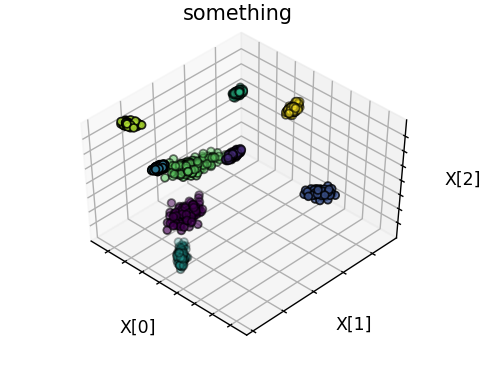

In [96]:
plot_graph(kL, X)

In [97]:
def plot_line(X, Y) :
    ax = plt.subplots()[1]
    plt.plot(X, Y)
    ax.set_ylabel('distortion')
    ax.set_xlabel('cluster count')


<IPython.core.display.Javascript object>


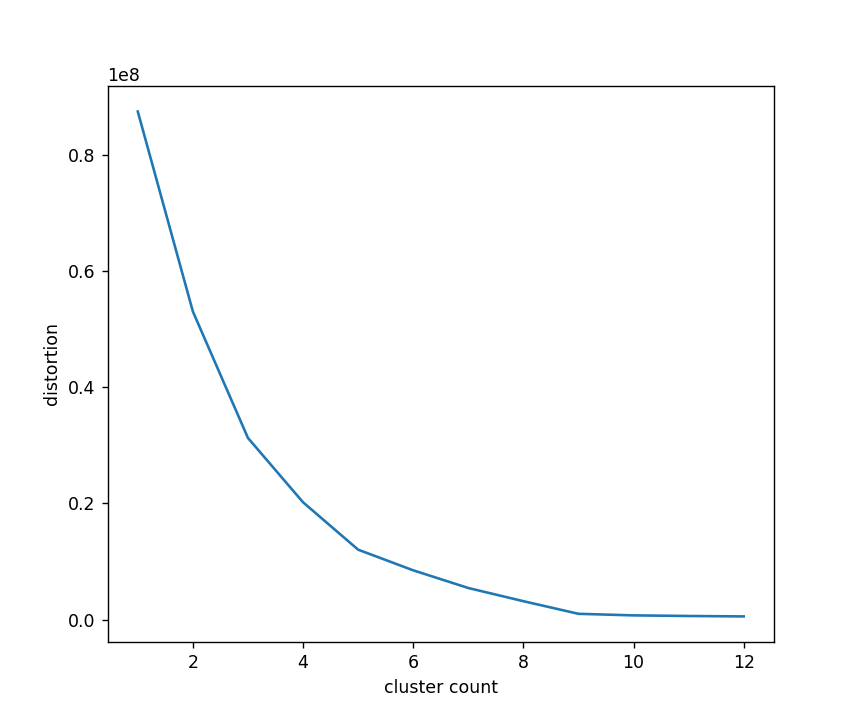

In [98]:
total_cluster_limit = 12
inertia = {}
for cluster in range(1, total_cluster_limit+1) :
    k = create_kmeans(cluster, X)
    inertia[cluster] = k.inertia_

plot_line(list(inertia.keys()), list(inertia.values()))   
